# ACTIVIDAD 2

## GRUPO 2 - Carlos Gonzalez Van Liempt y Álvaro Farreny Boixader

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">Twitter Web Scraping</h2>

In [3]:
#pip install tweepy==4.12.0

In [4]:
"""pip install tweepy==3.10.0
pip install tweepy==4.12.0"""

'pip install tweepy==3.10.0\npip install tweepy==4.12.0'

In [5]:
#try:
#    import tweepy
#except ModuleNotFoundError:
#    !pip install tweepy

In [6]:
#pip install TextBlob

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import time
import nltk

BUSQUEDA DE LOS TWEETS QUE CONTENGAN BITCOIN

In [8]:
df = pd.DataFrame(columns=['Autor', 'Contenido', 'Analisis'])

client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAIV9iAEAAAAABkMM0c9J7Qe1jgFj%2BbtdW4C9vkw%3DSaUUIEGcbOwfPRgWoDKJ6BP6RAJ7wOzpT7SuEskgByo3EWLB3d") # Utilizamos el token Bearer para autentificarnos en twitter

#INFORMACIÓN SOBRE LOS VALORES QUE SE LE PUEDEN DAR A LA QUERY!!
# https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-all

query = "Bitcoin -is:retweet lang:en" # Introducimos con que mensajes queremos que filtre, junto con la condición de que no debe ser un retweet y el idioma debe ser en español
response = client.search_recent_tweets(query=query, max_results=50, tweet_fields=["lang"], expansions=["author_id"]) # realizamos la query con un límite de 20 tweets ( se puede modificar )

users = {u["id"]: u for u in response.includes["users"]} # Relacionamos el id de usuario con el nombre de usuario para crear una lista de usuarios con la que trabajar

for tweet in response.data:  
    if users[tweet.author_id]:
        # Crear un objeto de TextBlob con el texto del tweet
        twt = TextBlob(str(tweet))
        user = users[tweet.author_id]
        df = df.append({'Autor':user.username,'Contenido':str(tweet), 'Analisis':str(twt.sentiment)},ignore_index=True) # Introducimos los valores en el dataframe
#PRINTEAMOS EL DATAFRAME
df

NameError: name 'tweepy' is not defined

FUNCIONAMIENTO DE LA LIBRERIA TEXTBLOB

Sentiment(polarity=0.625, subjectivity=0.6) es el resultado que devuelve el método sentiment de la librería TextBlob cuando se le aplica a un texto determinado.

La polaridad es un valor que indica el estado de ánimo o la opinión expresada en un texto, y va de -1 a 1, siendo -1 una opinión muy negativa, 0 una opinión neutral, y 1 una opinión muy positiva. Por otro lado, la subjetividad es un valor que indica el grado de subjetividad o objetividad del texto, y también va de 0 a 1, siendo 0 un texto muy objetivo y 1 un texto muy subjetivo.

En el ejemplo Sentiment(polarity=0.625, subjectivity=0.6), se puede observar que la polaridad es 0.625, lo que indica que el texto tiene una opinión positiva, pero no muy fuerte. Por otro lado, la subjetividad

In [ ]:
# Importar la librería necesaria
from textblob import TextBlob

# Crear un objeto de TextBlob con el texto del tweet
tweet = TextBlob("I love Bitcoin! I'm gonna buy right now")

# Mostrar el resultado del análisis de sentimientos
print(tweet.sentiment)

### ANALISIS DE LOS SENTIMIENTOS OBTENIDOS ANTERIORMENTE 

In [ ]:
# Inicializar variables para contar la cantidad de tweets por sentimiento
pos_tweets = 0
neg_tweets = 0
neu_tweets = 0

for tweet in response.data:  
    if users[tweet.author_id]:
        analysis = TextBlob(str(tweet))
        # Incrementar la cantidad de tweets con sentimiento positivo, negativo o neutral
        if analysis.sentiment.polarity > 0:
            pos_tweets += 1
        elif analysis.sentiment.polarity < 0:
            neg_tweets += 1
        else:
            neu_tweets += 1

# Crear un gráfico de barras con los resultados obtenidos
plt.bar(["Positivos", "Negativos", "Neutrales"], [pos_tweets, neg_tweets, neu_tweets])
plt.title("Sentimientos en tweets sobre Bitcoin")
plt.show()

OTRA FORMA DE ANALISIS

In [ ]:
# Inicializar una lista para almacenar los sentimientos en el tiempo
sentiments = []

In [ ]:
for tweet in response.data:  
    if users[tweet.author_id]:
        analysis = TextBlob(str(tweet))
        # Añadir el sentimiento del tweet a la lista
        sentiments.append(analysis.sentiment.polarity)
        
# Crear un gráfico de líneas con los resultados obtenidos
plt.plot(sentiments)
plt.title("Sentimientos en tweets sobre Bitcoin")
plt.show()

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">CSV Tweet Scraping</h2>

##### Utilizamos Pandas para cargar los datos del archivo .csv que hemos obtenido de kaggle
https://www.kaggle.com/datasets/alaix14/bitcoin-tweets-20160101-to-20190329

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import time
import nltk

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
df = pd.read_csv('./data/tweetsKaggle.csv',sep=';', nrows=1000000, usecols=['timestamp','text'])
df.head()

,timestamp,text
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [34]:
df[['Date','Time']] = df.timestamp.str.split(expand=True)
df.head()

,timestamp,text,Date,Time
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27,11:49:14+00
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27,11:49:18+00
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...,2019-05-27,11:49:06+00
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27,11:49:22+00
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27,11:49:23+00


In [35]:
df=df[['Date','text']]
df.head()

,Date,text
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27,Another Test tweet that wasn't caught in the s...
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [36]:
df = df.dropna()
df.head()

,Date,text
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27,Another Test tweet that wasn't caught in the s...
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [37]:
# Convert the "date" column to a DatetimeIndex
date_index = pd.to_datetime(df['Date'])
print(date_index)

0        2019-05-27
1        2019-05-27
2        2019-05-27
3        2019-05-27
4        2019-05-27
            ...    
999995   2019-05-21
999996   2019-05-21
999997   2019-05-21
999998   2019-05-21
999999   2019-05-21
Name: Date, Length: 1000000, dtype: datetime64[ns]


In [38]:
df = df.drop('Date', axis=1)

In [40]:
df

,text
0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,Cardano: Digitize Currencies; EOS https://t.co...
2,Another Test tweet that wasn't caught in the s...
3,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...
...,...
999995,Dutch Man Arrested Over $2.2 Million Bitcoin M...
999996,This is how crypto can do some of it's best wo...
999997,クレイグ・ライト氏、\nBitcoinホワイトペーパー\n著作権を登録 ✍️\n💸BSV高騰...
999998,Bitcoin doesn't have inherent value. \nAltcoin...


In [41]:
# Set the DatetimeIndex as the index of the DataFrame
df['Fecha'] = date_index

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   text    1000000 non-null  object        
 1   Fecha   1000000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 22.9+ MB


In [46]:
df.head()

,text,Fecha
0,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27
1,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27
2,Another Test tweet that wasn't caught in the s...,2019-05-27
3,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27
4,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27


In [7]:
#nltk.download("vader_lexicon")

In [47]:
analyzer = SentimentIntensityAnalyzer()
sentimientos = []
for texto in df['text']:
    sentiment = analyzer.polarity_scores(texto)
    analisis = sentiment['compound']
    sentimientos.append(analisis)
    
df['sentimientos'] = sentimientos

In [49]:
df.head()

,text,Fecha,sentimientos
0,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27,0.0000
1,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27,-0.1027
2,Another Test tweet that wasn't caught in the s...,2019-05-27,0.0000
3,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27,0.0000
4,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27,0.3612


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   text          1000000 non-null  object        
 1   Fecha         1000000 non-null  datetime64[ns]
 2   sentimientos  1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 30.5+ MB


In [51]:
df = df.drop('text', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Fecha         1000000 non-null  datetime64[ns]
 1   sentimientos  1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.9 MB


In [62]:
# AHORA AGRUPAMOS POR MES
print(df.dtypes)

Fecha           datetime64[ns]
sentimientos           float64
dtype: object


In [65]:
# Group the DataFrame by day
dfdiario = df.groupby(by="Fecha").sum()

In [81]:
print(dfdiario)

            sentimientos
Fecha                   
2009-01-11        0.0000
2011-01-09       -0.3400
2011-04-14       -0.4215
2011-05-10        0.7096
2011-05-14        0.3612
...                  ...
2019-05-23        1.8920
2019-05-24        0.9614
2019-05-25        7.2337
2019-05-26       24.7429
2019-05-27      781.1298

[2044 rows x 1 columns]


In [83]:
dfmes = df.groupby(pd.Grouper(key='Fecha', freq='1M')).sum()

In [87]:
display(dfmes)

,sentimientos
Fecha,
2009-01-31,0.0000
2009-02-28,0.0000
2009-03-31,0.0000
2009-04-30,0.0000
2009-05-31,0.0000
...,...
2019-01-31,90.8226
2019-02-28,117.7682
2019-03-31,390.4884


## GRAFICO DIARIO

<AxesSubplot:title={'center':'Diagrama de Lineas'}, xlabel='Fecha', ylabel='Suma de valores'>

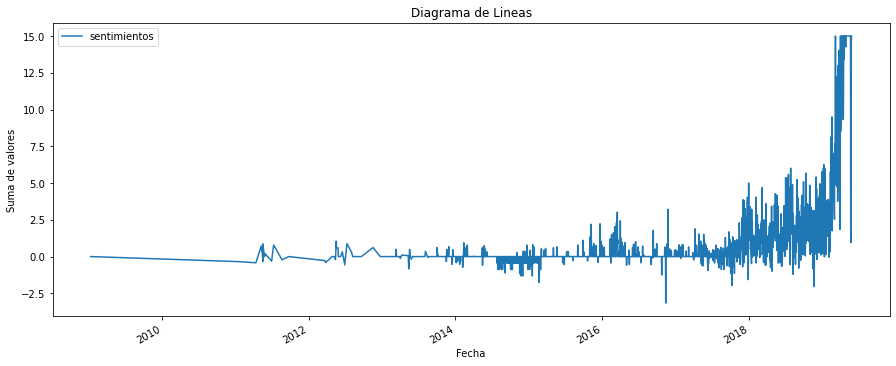

In [76]:
dfgrafico = dfdiario.clip(upper=15)
dfgrafico.plot(kind='line', title='Diagrama de Lineas', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

<AxesSubplot:title={'center':'Diagrama de Cajas'}, ylabel='Suma de valores'>

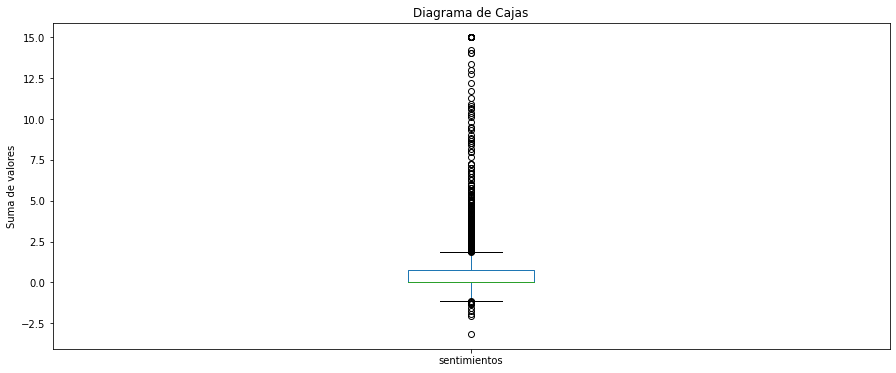

In [75]:
dfgrafico.plot(kind='box', title='Diagrama de Cajas', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

## GRAFICO POR MES

<AxesSubplot:title={'center':'Diagrama de Lineas'}, xlabel='Fecha', ylabel='Suma de valores'>

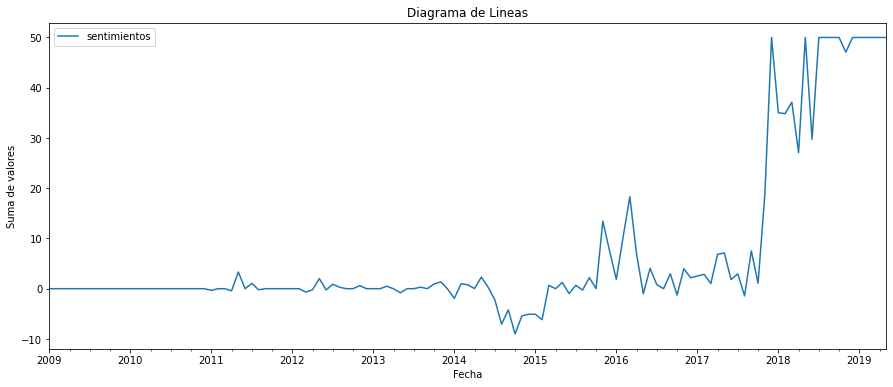

In [94]:
dfgraficomes = dfmes.clip(upper=50)
dfgraficomes.plot(kind='line', title='Diagrama de Lineas', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

<AxesSubplot:title={'center':'Diagrama de Cajas'}, ylabel='Suma de valores'>

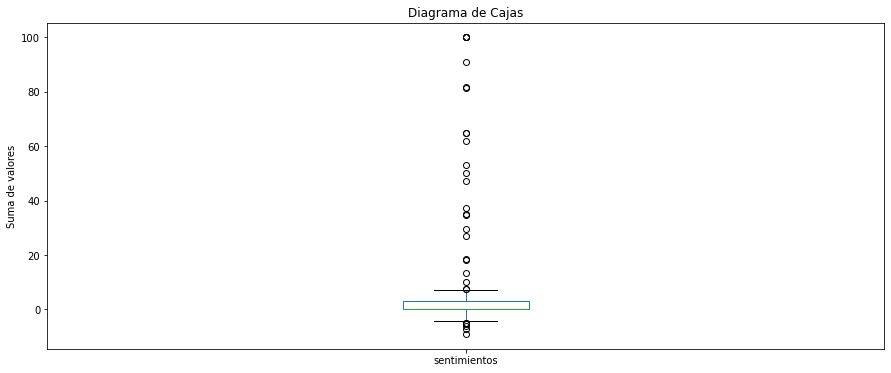

In [93]:
dfgraficomes.plot(kind='box', title='Diagrama de Cajas', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

por quartiles en vez de barras y lineas

ademas organizar el date por mes y año en vez de x dia

retocar el modelo predictivo para subirle en la entrega